In [174]:
from src.data_generating_process import DataGeneratingProcess as DGP
from src.link_function import L as LF
import seaborn as sns

dist_type = 'normal'
dist_para = {'loc': 0, 'scale': 1}

f = DGP.Distribution(seed=1800,
          distribution_type=dist_type,
          distribution_params=dist_para)
f2 = DGP.Distribution(seed=100,
                      distribution_type='uniform',
                      distribution_params={'low': -1, 'high': 1})

f3 = DGP.Distribution(seed=100,
                      distribution_type='uniform',
                      distribution_params={'low': -0.5, 'high': 0.5})

x1 = DGP.Term(1, 'X1', f)
x2 = DGP.Term(1, 'X2', f2)
x3 = DGP.Term(5, 'X3', f3)


dgp = DGP.DataGeneratingProcess(terms=[x1, x2, x3], sample_size=30, link_fct = LF.logit_random_link )
dgp.describe()
dgp.feature_data


Process: +1*X1 +1*X2 +5*X3  
 Variables: 

1 X1 ~               normal               {'loc': 0, 'scale': 1} 
1 X2 ~               uniform               {'low': -1, 'high': 1} 
5 X3 ~               uniform               {'low': -0.5, 'high': 0.5} 

 Link function: logit_random_link


,X1,X2,X3
0,-0.206759,0.669963,0.334982
1,-1.352304,0.193108,0.096554
2,0.268497,-0.422274,-0.211137
3,0.005089,-0.914097,-0.457048
4,-1.046540,0.947309,0.473654
5,-1.228009,0.192943,0.096472
6,0.059297,0.580526,0.290263
7,-0.538590,0.820679,0.410339
8,-0.534690,0.376309,0.188154
9,-2.610126,-0.620017,-0.310009


,X1,X2,X3
0,-0.206759,0.669963,0.334982
1,-1.352304,0.193108,0.096554
2,0.268497,-0.422274,-0.211137
3,0.005089,-0.914097,-0.457048
4,-1.046540,0.947309,0.473654
5,-1.228009,0.192943,0.096472
6,0.059297,0.580526,0.290263
7,-0.538590,0.820679,0.410339
8,-0.534690,0.376309,0.188154
9,-2.610126,-0.620017,-0.310009


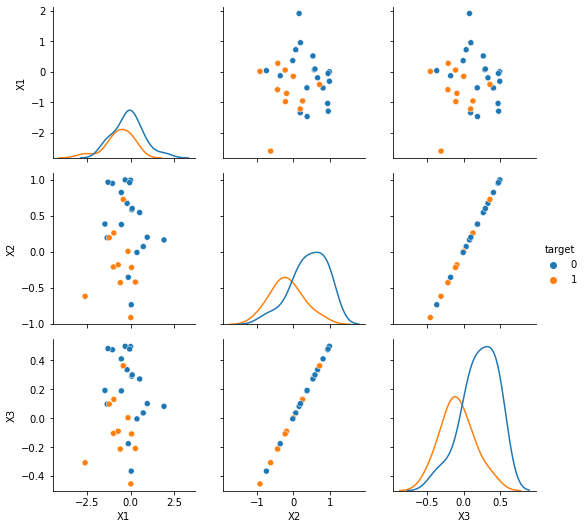

In [175]:
plotable = dgp.feature_data.copy()
plotable['target'] = dgp.target_data
g = sns.PairGrid(plotable, hue='target')
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()
dgp.feature_data


In [176]:
from sklearn.model_selection import train_test_split
from sklearn import metrics as mt
import pandas as pd
import seaborn as sns
import xgboost as xgb
from xgboost import XGBClassifier


/usr/local/Caskroom/miniconda/base/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/Caskroom/miniconda/base/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18:26:40] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


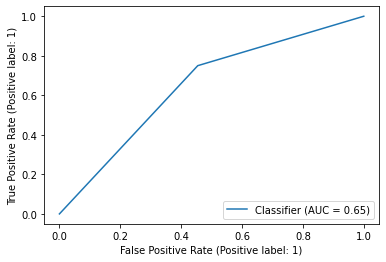

In [177]:
X_train, X_test, y_train, y_test = train_test_split(
    dgp.feature_data, dgp.target_data, test_size=.50, random_state=13)

# create model instance
bst = XGBClassifier(n_estimators=10000, max_depth=4,
                    learning_rate=0.01, objective='binary:logistic')

# fit model
bst.fit(X_train, y_train)

# make predictions
preds = bst.predict(X_test)
mt.RocCurveDisplay.from_predictions(y_pred=preds, y_true=y_test)




In [178]:
dgp.feature_data


,X1,X2,X3
0,-0.206759,0.669963,0.334982
1,-1.352304,0.193108,0.096554
2,0.268497,-0.422274,-0.211137
3,0.005089,-0.914097,-0.457048
4,-1.046540,0.947309,0.473654
5,-1.228009,0.192943,0.096472
6,0.059297,0.580526,0.290263
7,-0.538590,0.820679,0.410339
8,-0.534690,0.376309,0.188154
9,-2.610126,-0.620017,-0.310009
